In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv('filled_train_test_dataset.csv')
df_Id = pd.DataFrame(list(df.iloc[:,0]+1), columns = ['Id'])
df = df.iloc[:,1:]
print(df.shape)
df.head()

(2919, 75)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [11]:
print(df_Id.shape)
df_Id.head()

(2919, 1)


,Id
0,1
1,2
2,3
3,4
4,5


In [12]:
continuous_variables = list(df.describe().keys())
continuous_variables.remove('OverallQual')
continuous_variables.remove('OverallCond')
##removing the response from predictors list
response_variable = continuous_variables[-1]
continuous_variables.remove(response_variable)

In [13]:
categorical_variables = list(set(df.columns)-set(continuous_variables))
categorical_variables.remove(response_variable)

In [16]:
corr_df = df[continuous_variables].corr()
corr_df

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.420197,-0.201730,0.034409,0.043315,0.005422,-0.064302,-0.072520,-0.125978,-0.219936,...,-0.103392,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028
LotFrontage,-0.420197,1.000000,0.520226,0.099702,0.066936,0.218932,0.219572,0.059371,0.108980,0.358437,...,0.358568,0.126162,0.164491,0.023942,0.041094,0.068635,0.168445,0.035428,0.009399,-0.010031
LotArea,-0.201730,0.520226,1.000000,0.024128,0.021612,0.125354,0.194021,0.084055,0.021361,0.254125,...,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234
YearBuilt,0.034409,0.099702,0.024128,1.000000,0.612235,0.312579,0.279547,-0.027591,0.130457,0.408466,...,0.480525,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344
YearRemodAdd,0.043315,0.066936,0.021612,0.612235,1.000000,0.196117,0.152056,-0.062125,0.165099,0.297969,...,0.376733,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203
MasVnrArea,0.005422,0.218932,0.125354,0.312579,0.196117,1.000000,0.301999,-0.015633,0.089712,0.395632,...,0.372865,0.165839,0.143659,-0.111156,0.013611,0.065188,0.004512,0.044810,-0.000117,-0.018457
BsmtFinSF1,-0.064302,0.219572,0.194021,0.279547,0.152056,0.301999,1.000000,-0.055045,-0.477404,0.536467,...,0.310403,0.223471,0.124153,-0.099710,0.050908,0.096821,0.084462,0.093295,-0.000942,0.022556
BsmtFinSF2,-0.072520,0.059371,0.084055,-0.027591,-0.062125,-0.015633,-0.055045,1.000000,-0.238241,0.089410,...,0.003139,0.098389,-0.005875,0.032739,-0.023279,0.063301,0.044524,-0.005139,-0.009592,0.008883
BsmtUnfSF,-0.125978,0.108980,0.021361,0.130457,0.165099,0.089712,-0.477404,-0.238241,1.000000,0.412285,...,0.164377,-0.039298,0.119753,0.005006,-0.005810,-0.049157,-0.032273,-0.010492,0.022604,-0.038015
TotalBsmtSF,-0.219936,0.358437,0.254125,0.408466,0.297969,0.395632,0.536467,0.089410,0.412285,1.000000,...,0.485984,0.229579,0.245500,-0.085508,0.037892,0.075362,0.072216,0.084001,0.017886,-0.011184


In [17]:
col1, col2, col3 = [], [], []
not_null_response = df[response_variable].notnull().sum()
count = 6
for i in np.arange(0, len(corr_df.columns)):
    col1.append(corr_df.columns[i])
    col2.append(list((corr_df.iloc[:,i].nlargest(count)[1:]).keys() + '__' + list(map(str,(corr_df.iloc[:,i].nlargest(count)[1:]).values))))

for cat in continuous_variables:
    col3.append(round(np.corrcoef(df[response_variable].iloc[:not_null_response,], df[cat].iloc[:not_null_response,])[0,1], count))    

In [28]:
col1 = pd.DataFrame(col1,columns=['col'])
col2 = pd.DataFrame(col2,columns=['corr'+str(i) for i in range(1,count)])
col3 = pd.DataFrame(col3,columns=[response_variable])
corr_strong_df=pd.concat([col1, col3, col2],axis=1)
corr_strong_df

,col,SalePrice,corr1,corr2,corr3,corr4,corr5
0,MSSubClass,-0.084284,2ndFlrSF__0.3093091069151059,KitchenAbvGr__0.2601554859387976,HalfBath__0.17875018530614414,FullBath__0.13913961291454544,GrLivArea__0.07167745094705506
1,LotFrontage,0.360689,LotArea__0.5202258700090379,1stFlrSF__0.47045879066596996,GrLivArea__0.39125090425385384,GarageArea__0.35856806026033616,TotalBsmtSF__0.35843690279308194
2,LotArea,0.263843,LotFrontage__0.5202258700090379,1stFlrSF__0.33246048933098465,GrLivArea__0.2845186972195258,Fireplaces__0.26118470469986055,TotalBsmtSF__0.25412529577309556
3,YearBuilt,0.522897,GarageYrBlt__0.8444485685282074,YearRemodAdd__0.6122345697556568,GarageCars__0.5376628328906231,GarageArea__0.4805253111013122,FullBath__0.47116894688450267
4,YearRemodAdd,0.507101,GarageYrBlt__0.6406819698498704,YearBuilt__0.6122345697556568,FullBath__0.4579798714411741,GarageCars__0.4260525743472284,GarageArea__0.3767332564019214
5,MasVnrArea,0.475210,GrLivArea__0.40203245115568126,TotalBsmtSF__0.395631901242194,1stFlrSF__0.3937609848965277,GarageArea__0.3728649605557659,GarageCars__0.3600128821847402
6,BsmtFinSF1,0.386420,BsmtFullBath__0.6388692180783079,TotalBsmtSF__0.5364674665459308,1stFlrSF__0.45805628946565907,GarageArea__0.3104034489755857,MasVnrArea__0.30199939968800066
7,BsmtFinSF2,-0.011378,BsmtFullBath__0.16287710705987393,BsmtHalfBath__0.09950645876750688,WoodDeckSF__0.09838926430677519,TotalBsmtSF__0.08940995192517513,1stFlrSF__0.08432318848621262
8,BsmtUnfSF,0.214479,TotalBsmtSF__0.41228488499683874,1stFlrSF__0.29657663080786706,FullBath__0.27315753084612093,TotRmsAbvGrd__0.24740136362258314,GrLivArea__0.2339309635157149
9,TotalBsmtSF,0.613581,1stFlrSF__0.8016079545001566,BsmtFinSF1__0.5364674665459308,GarageArea__0.48598389498402034,GrLivArea__0.4451669955147217,GarageCars__0.4378532191141993


In [29]:
corr_strong_df.sort_values(by = response_variable, axis = 0, ascending = False)

,col,SalePrice,corr1,corr2,corr3,corr4,corr5
13,GrLivArea,0.708624,TotRmsAbvGrd__0.8083544205418542,2ndFlrSF__0.6550846935436198,FullBath__0.6302856579750947,1stFlrSF__0.5625382522753379,BedroomAbvGr__0.5170576810548231
23,GarageCars,0.640409,GarageArea__0.8896861007153319,GarageYrBlt__0.6202958136649543,YearBuilt__0.5376628328906231,GrLivArea__0.48995792093545554,FullBath__0.48001233080221944
24,GarageArea,0.623431,GarageCars__0.8896861007153319,GarageYrBlt__0.5966711484119137,1stFlrSF__0.4919852857082906,TotalBsmtSF__0.48598389498402034,GrLivArea__0.48543393805032553
9,TotalBsmtSF,0.613581,1stFlrSF__0.8016079545001566,BsmtFinSF1__0.5364674665459308,GarageArea__0.48598389498402034,GrLivArea__0.4451669955147217,GarageCars__0.4378532191141993
10,1stFlrSF,0.605852,TotalBsmtSF__0.8016079545001566,GrLivArea__0.5625382522753379,GarageArea__0.4919852857082906,LotFrontage__0.47045879066596996,BsmtFinSF1__0.45805628946565907
16,FullBath,0.560664,GrLivArea__0.6302856579750947,TotRmsAbvGrd__0.5273369933378045,GarageYrBlt__0.4801413535580831,GarageCars__0.48001233080221944,YearBuilt__0.47116894688450267
20,TotRmsAbvGrd,0.533723,GrLivArea__0.8083544205418542,BedroomAbvGr__0.6697372307298393,2ndFlrSF__0.5845858776773477,FullBath__0.5273369933378045,1stFlrSF__0.39178237904326385
3,YearBuilt,0.522897,GarageYrBlt__0.8444485685282074,YearRemodAdd__0.6122345697556568,GarageCars__0.5376628328906231,GarageArea__0.4805253111013122,FullBath__0.47116894688450267
22,GarageYrBlt,0.518068,YearBuilt__0.8444485685282074,YearRemodAdd__0.6406819698498704,GarageCars__0.6202958136649543,GarageArea__0.5966711484119137,FullBath__0.4801413535580831
4,YearRemodAdd,0.507101,GarageYrBlt__0.6406819698498704,YearBuilt__0.6122345697556568,FullBath__0.4579798714411741,GarageCars__0.4260525743472284,GarageArea__0.3767332564019214


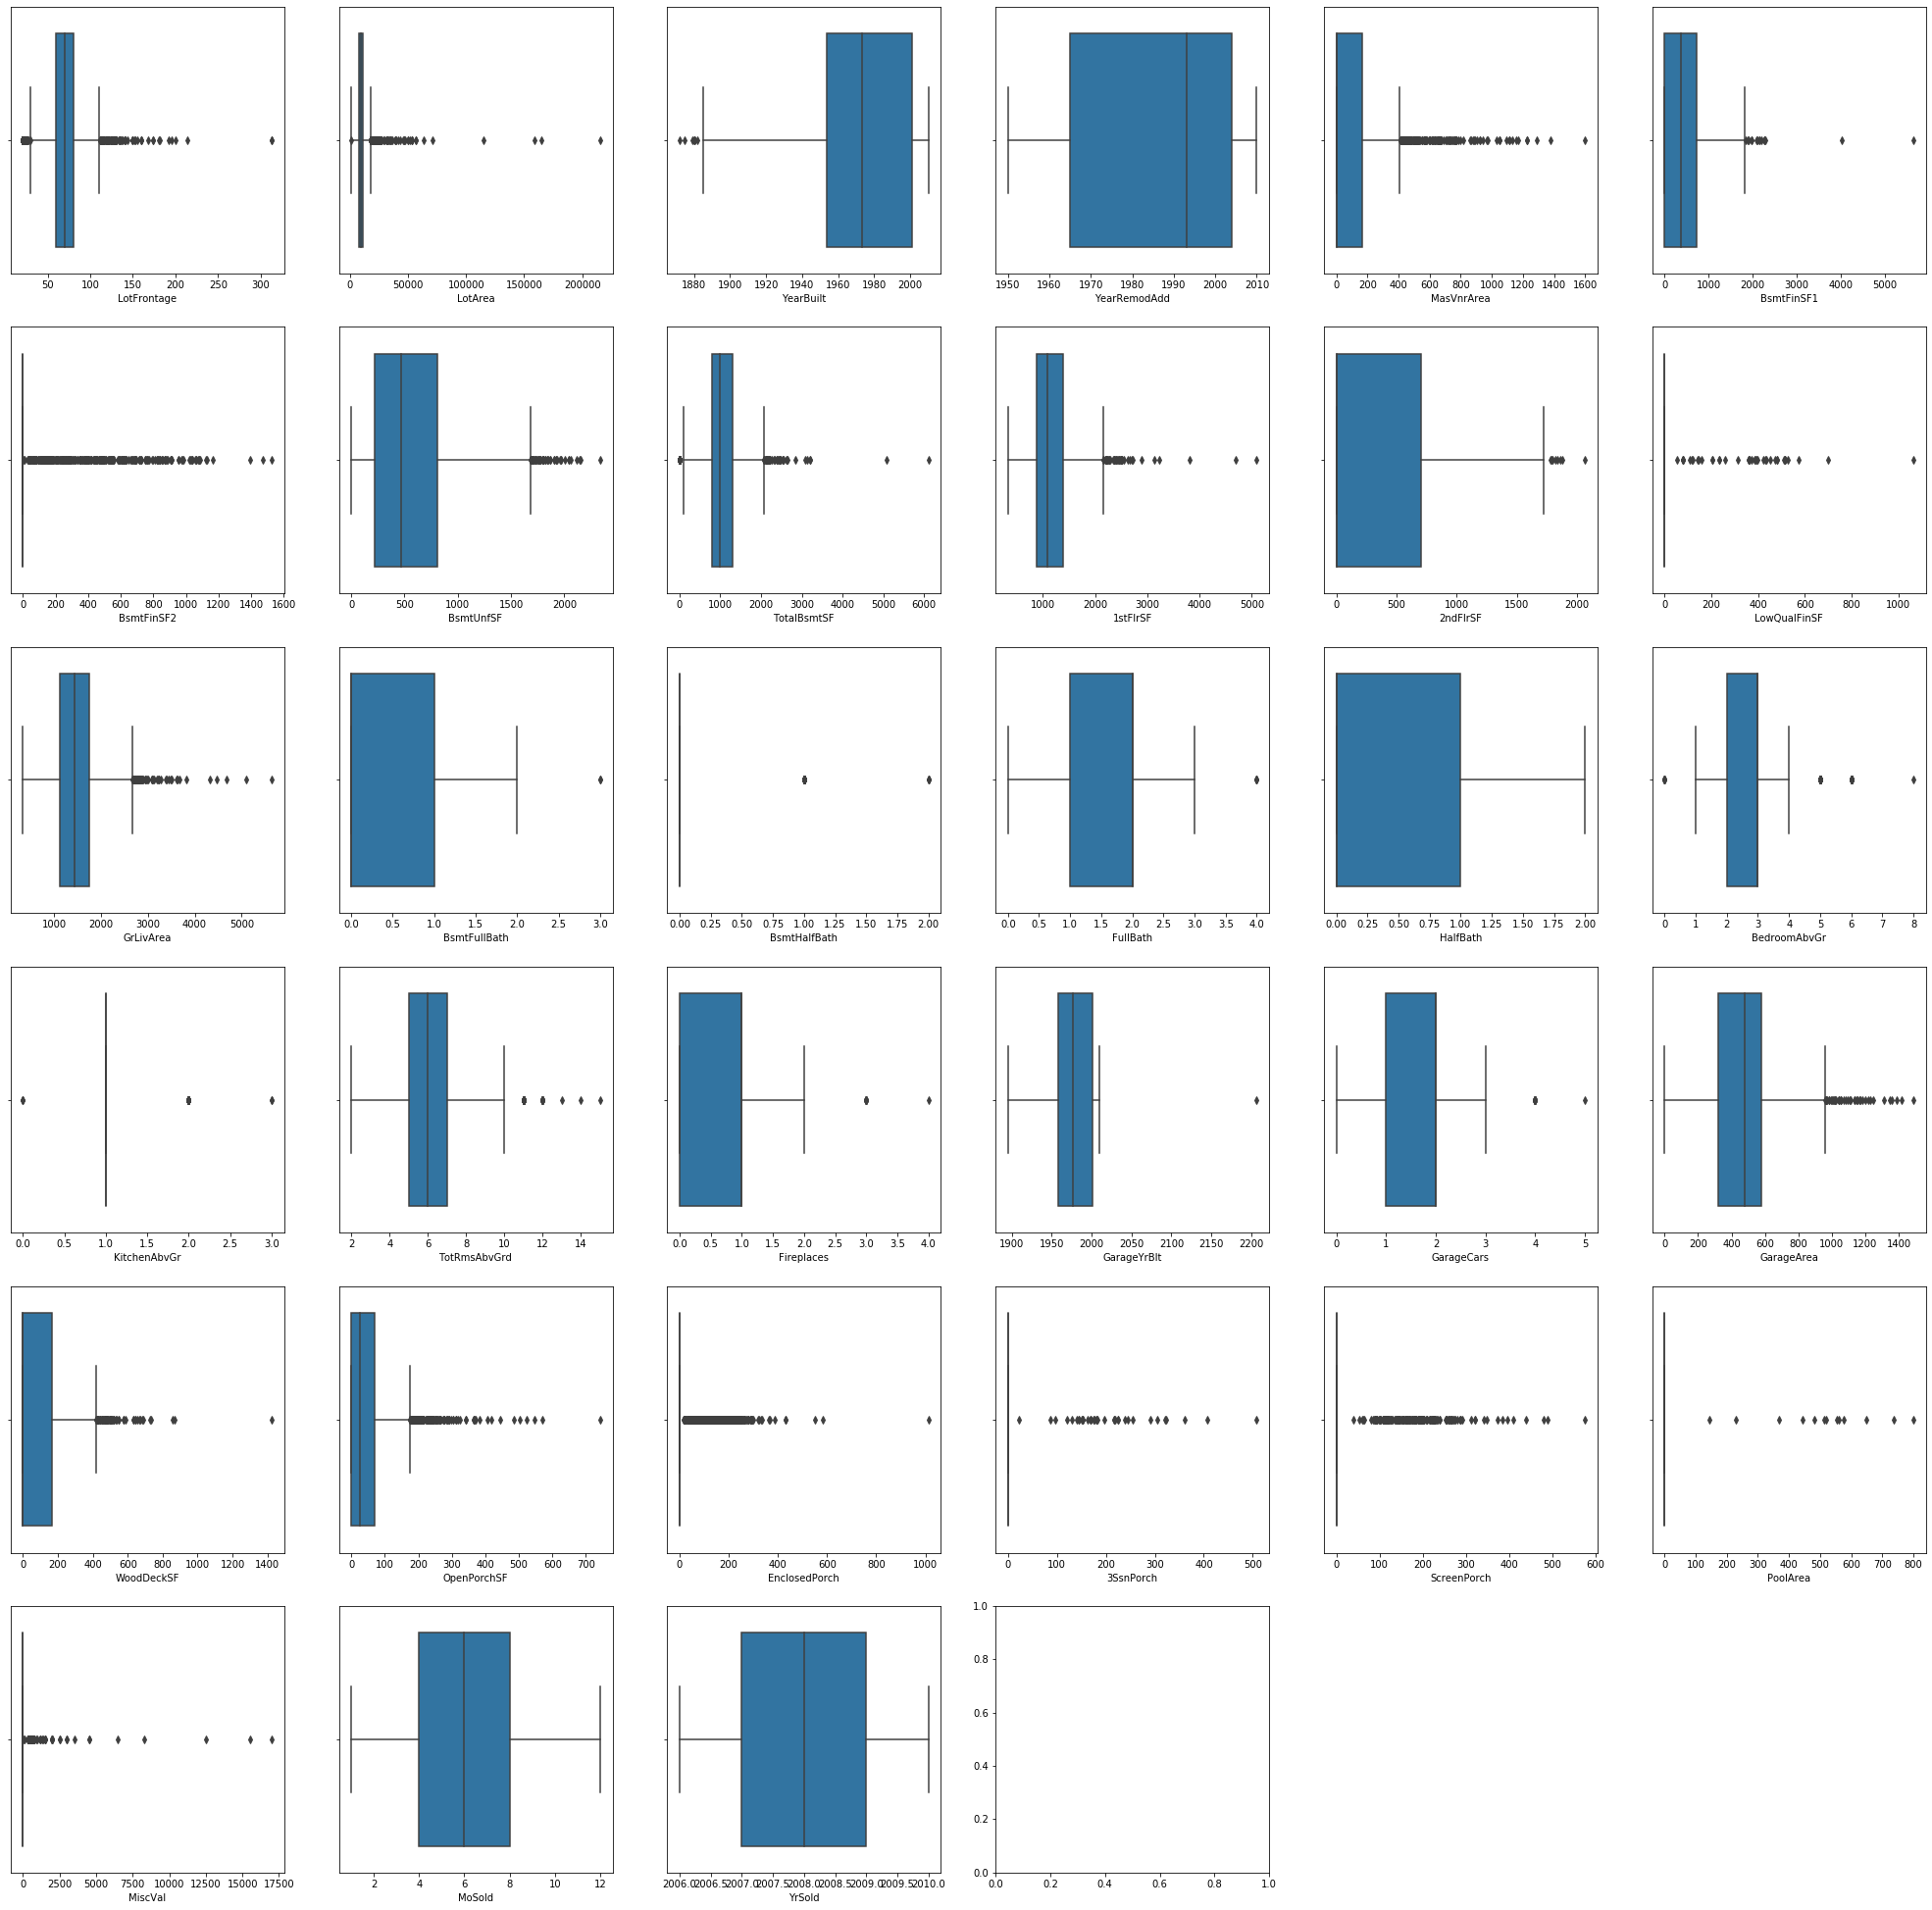

In [108]:
plt.figure(figsize = (35,35))
for i in np.arange(0, len(continuous_variables)):
    sns.boxplot(df[continuous_variables[i]])
    plt.subplot(6,6,i+1)
plt.show()

In [39]:
def Outlier_Detection(df_temp):
    outlier_indices = []
    for cat in continuous_variables:
        feature = df_temp[cat]
        z_scores = zscore(feature)
        indices = feature[(z_scores<-3)|(z_scores>3)].index
        outlier_indices.extend(indices)
        #print(cat+'\t',str(len(indices))+'\t', round(len(indices)/len(feature),5)*100)
        #print(indices)
        #print('\n')
    return pd.Series(outlier_indices).value_counts()

In [40]:
from scipy.stats import zscore
outliers = Outlier_Detection(df)
outliers

2549    12
1298    12
1182     7
523      7
691      6
197      6
1974     6
635      6
769      5
2263     5
185      5
496      5
2599     5
2557     5
1350     5
2682     5
1386     4
224      4
335      4
2424     4
1671     4
2513     4
1230     4
1173     4
1790     4
1677     4
1863     4
1862     4
2188     4
1169     4
        ..
774      1
2818     1
2816     1
2815     1
1623     1
763      1
2810     1
113      1
2807     1
755      1
2797     1
1613     1
784      1
2843     1
813      1
2874     1
2870     1
2869     1
2825     1
2863     1
814      1
1603     1
1605     1
810      1
809      1
808      1
2045     1
2851     1
799      1
2721     1
Length: 823, dtype: int64

In [68]:
outlier_threshold = np.floor(len(continuous_variables)/10)
outliers_to_remove = outliers[outliers>=outlier_threshold].keys()
df.iloc[outliers_to_remove,]
df.drop(index=outliers_to_remove,axis=0,inplace=True)

In [70]:
df.shape
df.to_csv(path_or_buf='C:\\MyDrive\\MyStuff\\DataScience\\Data_Science_Projects\\kaggle_house_price_regression\\filled_train_test_dataset.csv')